In [43]:
from numpy import *
from scipy import integrate
from scipy.optimize import fsolve
from scipy.signal import hilbert
import pandas as pd
from scipy.signal import argrelextrema
import pylab as p
import matplotlib.pyplot as plt
import math
import seaborn as sns
from functools import wraps
from statistics import covariance
import numdifftools as nd
import sdeint
from scipy.signal import argrelextrema
from random import Random
import os
os.getcwd()
import sys
import time
import matplotlib
import IPython
matplotlib.pyplot.ion()
from numpy.linalg import multi_dot

In [44]:
##############################################
##### Query Data File ####################
##############################################

def query(newFilter=pd.DataFrame(),valGrp=['eg_0','eta_0'],prfile='plot_par.csv',varfile='plot_var.csv'):

    Bigdata=pd.read_csv(''.join([path_data,'recengDB.csv']))
    pr=pd.read_csv(''.join([path_data,prfile]))
    vl=genfromtxt(''.join([path_data,varfile]),delimiter=',',dtype=str)
    
    valN=newFilter.columns.values
    for i in range(size(newFilter)): pr[valN[i]][0]=newFilter[valN[i]][0]
    #newFilter should be of the form pd.DataFrame({'var':[val],'var':[val],'var':[val]})
    
    keys=pr.columns.values.tolist()
    for i in range(size(valGrp)): keys.remove(valGrp[i])
    i1 = Bigdata.set_index(keys).index
    i2 = pr.set_index(keys).index
    DataFilter=Bigdata[i1.isin(i2)]
    GroupedD=DataFilter.groupby(valGrp)[vl].mean().reset_index()
    return GroupedD

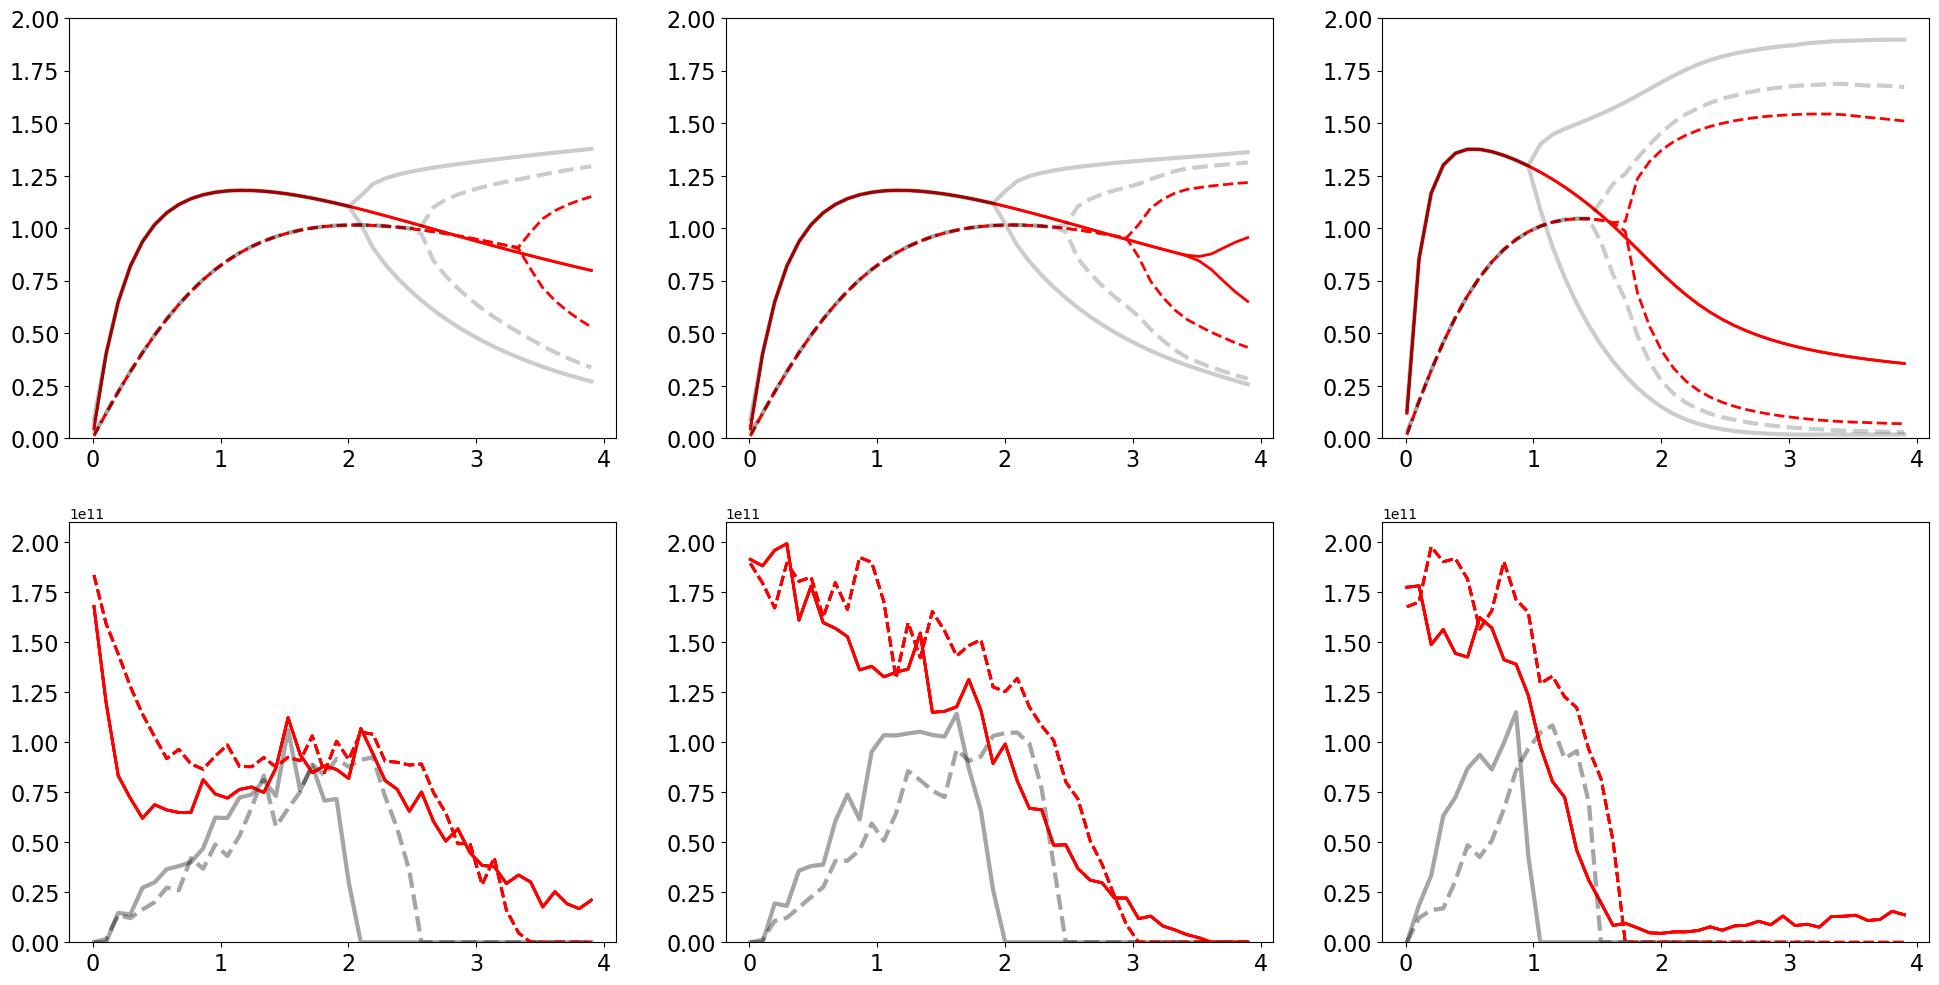

In [46]:
##################
###   PLOTS   ####
##################

### Consumer stocks and stochastic stability ###


#subfolder='auto_eng'

pd.options.mode.chained_assignment = None
bigD=1
bigJ=0

### spatial parameters
het=0
#connect=array([[-0.5,0.5],[0.5,-0.5]]) # between patches
connect=array([0])
#connect=array([[0,0],[0,0]]) # between patches
flow=array([0,0,0,0]) # for each compartment
patchnbr= len(connect)
ecodim= len(flow)#len(pr_sp['r'])
nutrient=0 # the nutrient compartment is the first position
detritus=ecodim-1 # the detritus compartment is at the last position


parfile='recengScenario.csv'
datafile='recengDB.csv'
#folder = ''.join(['./',subfolder,'/'])  
path_data='./data/'
path_params='./params/'
path_fig='./fig/'
isdir = os.path.isdir(path_fig)
if isdir==False: os.mkdir(path_fig)

lstyle=['-','--','-.']
transp=[1,0.2,0.1]
linewidth=[2,3,4]
clr=['r','k','b']

#yVal=[['minCtr','maxCtr'],['minAdj','maxAdj']]
#order=[ecodim,patchnbr,len(yVal),len(yVal[0]),gd['eg_0']] # order: (0) row, (1) column, (2) sets of variables, (3)  variables, (4) series
#dfF=pd.DataFrame({'':[],'':[],'':[]})


#yVal=[['minCtr','maxCtr'],['minAdj','maxAdj']]
fig, axs = plt.subplots(2,3,figsize=(24,12))


#order=[ecodim,patchnbr,len(yVal),len(yVal[0]),gd['eg_0']] # order: (0) row, (1) column, (2) sets of variables, (3)  variables, (4) series

target=2 # index of plotted species
var_ind=(target+1)*(1+ecodim)-ecodim

# first column (full recycling)

fltr=pd.DataFrame({'scenario_3':[0],'scenario_0':[0]})
gd=query(fltr)
yVal=[['minCtr','maxCtr'],['minAdj','maxAdj']]
order=[ecodim,patchnbr,len(yVal),len(yVal[0]),gd['eg_0']] # order: (0) row, (1) column, (2) sets of variables, (3)  variables, (4) series


for k in range(order[2]): # ctr vs adj
            for l in range(order[3]): # min,max
                st=0
                for m in unique(order[4]): # with or without engineering
                    axs[0][0].plot(gd[gd.eg_0==m].eta_0, gd[gd.eg_0==m]['_'.join([yVal[k][l],str(target)])],ls=lstyle[st],color=clr[k],alpha=transp[k],linewidth=linewidth[k]) 
                    axs[1][0].plot(gd[gd.eg_0==m].eta_0,(gd[gd.eg_0==m]['_'.join(['Xstoch',str(target)])]/gd[gd.eg_0==m]['_'.join(['Xcov',str(var_ind-1)])]),ls=lstyle[st],color=clr[0],alpha=transp[0],linewidth=linewidth[0])
                    axs[1][0].plot(gd[gd.eg_0==m].eta_0,(gd[gd.eg_0==m]['_'.join(['XstochAdj',str(target)])]/gd[gd.eg_0==m]['_'.join(['XcovAdj',str(var_ind-1)])]),ls=lstyle[st],color=clr[1],alpha=transp[2],linewidth=linewidth[1])
                    st+=1

# second column (decomposition only)

fltr=pd.DataFrame({'scenario_3':[1],'scenario_0':[0]})
gd=query(fltr)
yVal=[['minCtr','maxCtr'],['minAdj','maxAdj']]
order=[ecodim,patchnbr,len(yVal),len(yVal[0]),gd['eg_0']] # order: (0) row, (1) column, (2) sets of variables, (3)  variables, (4) series


for k in range(order[2]): # ctr vs adj
            for l in range(order[3]): # min,max
                st=0
                for m in unique(order[4]): # with or without engineering
                    axs[0][1].plot(gd[gd.eg_0==m].eta_0, gd[gd.eg_0==m]['_'.join([yVal[k][l],str(target)])],ls=lstyle[st],color=clr[k],alpha=transp[k],linewidth=linewidth[k]) 
                    axs[1][1].plot(gd[gd.eg_0==m].eta_0,(gd[gd.eg_0==m]['_'.join(['Xstoch',str(target)])]/gd[gd.eg_0==m]['_'.join(['Xcov',str(var_ind-1)])]),ls=lstyle[st],color=clr[0],alpha=transp[0],linewidth=linewidth[0])
                    axs[1][1].plot(gd[gd.eg_0==m].eta_0,(gd[gd.eg_0==m]['_'.join(['XstochAdj',str(target)])]/gd[gd.eg_0==m]['_'.join(['XcovAdj',str(var_ind-1)])]),ls=lstyle[st],color=clr[1],alpha=transp[2],linewidth=linewidth[1])
                    st+=1
#third column (no recycling)

fltr=pd.DataFrame({'scenario_3':[1],'scenario_0':[1]})
gd=query(fltr)
yVal=[['minCtr','maxCtr'],['minAdj','maxAdj']]
order=[ecodim,patchnbr,len(yVal),len(yVal[0]),gd['eg_0']] # order: (0) row, (1) column, (2) sets of variables, (3)  variables, (4) series


for k in range(order[2]): # ctr vs adj
            for l in range(order[3]): # min,max
                st=0
                for m in unique(order[4]): # with or without engineering
                    axs[0][2].plot(gd[gd.eg_0==m].eta_0, gd[gd.eg_0==m]['_'.join([yVal[k][l],str(target)])],ls=lstyle[st],color=clr[k],alpha=transp[k],linewidth=linewidth[k]) 
                    axs[1][2].plot(gd[gd.eg_0==m].eta_0,(gd[gd.eg_0==m]['_'.join(['Xstoch',str(target)])]/gd[gd.eg_0==m]['_'.join(['Xcov',str(var_ind-1)])]),ls=lstyle[st],color=clr[0],alpha=transp[0],linewidth=linewidth[0])
                    axs[1][2].plot(gd[gd.eg_0==m].eta_0,(gd[gd.eg_0==m]['_'.join(['XstochAdj',str(target)])]/gd[gd.eg_0==m]['_'.join(['XcovAdj',str(var_ind-1)])]),ls=lstyle[st],color=clr[1],alpha=transp[2],linewidth=linewidth[1])
                    st+=1



for j in range(3):
    for i in range(2):
        axs[0][j].set_ylim([0,2])
        axs[1][j].set_ylim([0,210000000000])
        axs[i][j].xaxis.label.set_size(18)
        axs[i][j].yaxis.label.set_size(16)
        axs[i][j].xaxis.set_tick_params(labelsize=16)
        axs[i][j].yaxis.set_tick_params(labelsize=16)

fig.savefig(''.join([path_fig,'receng_C_stoch_stab.pdf']),bbox_inches='tight')

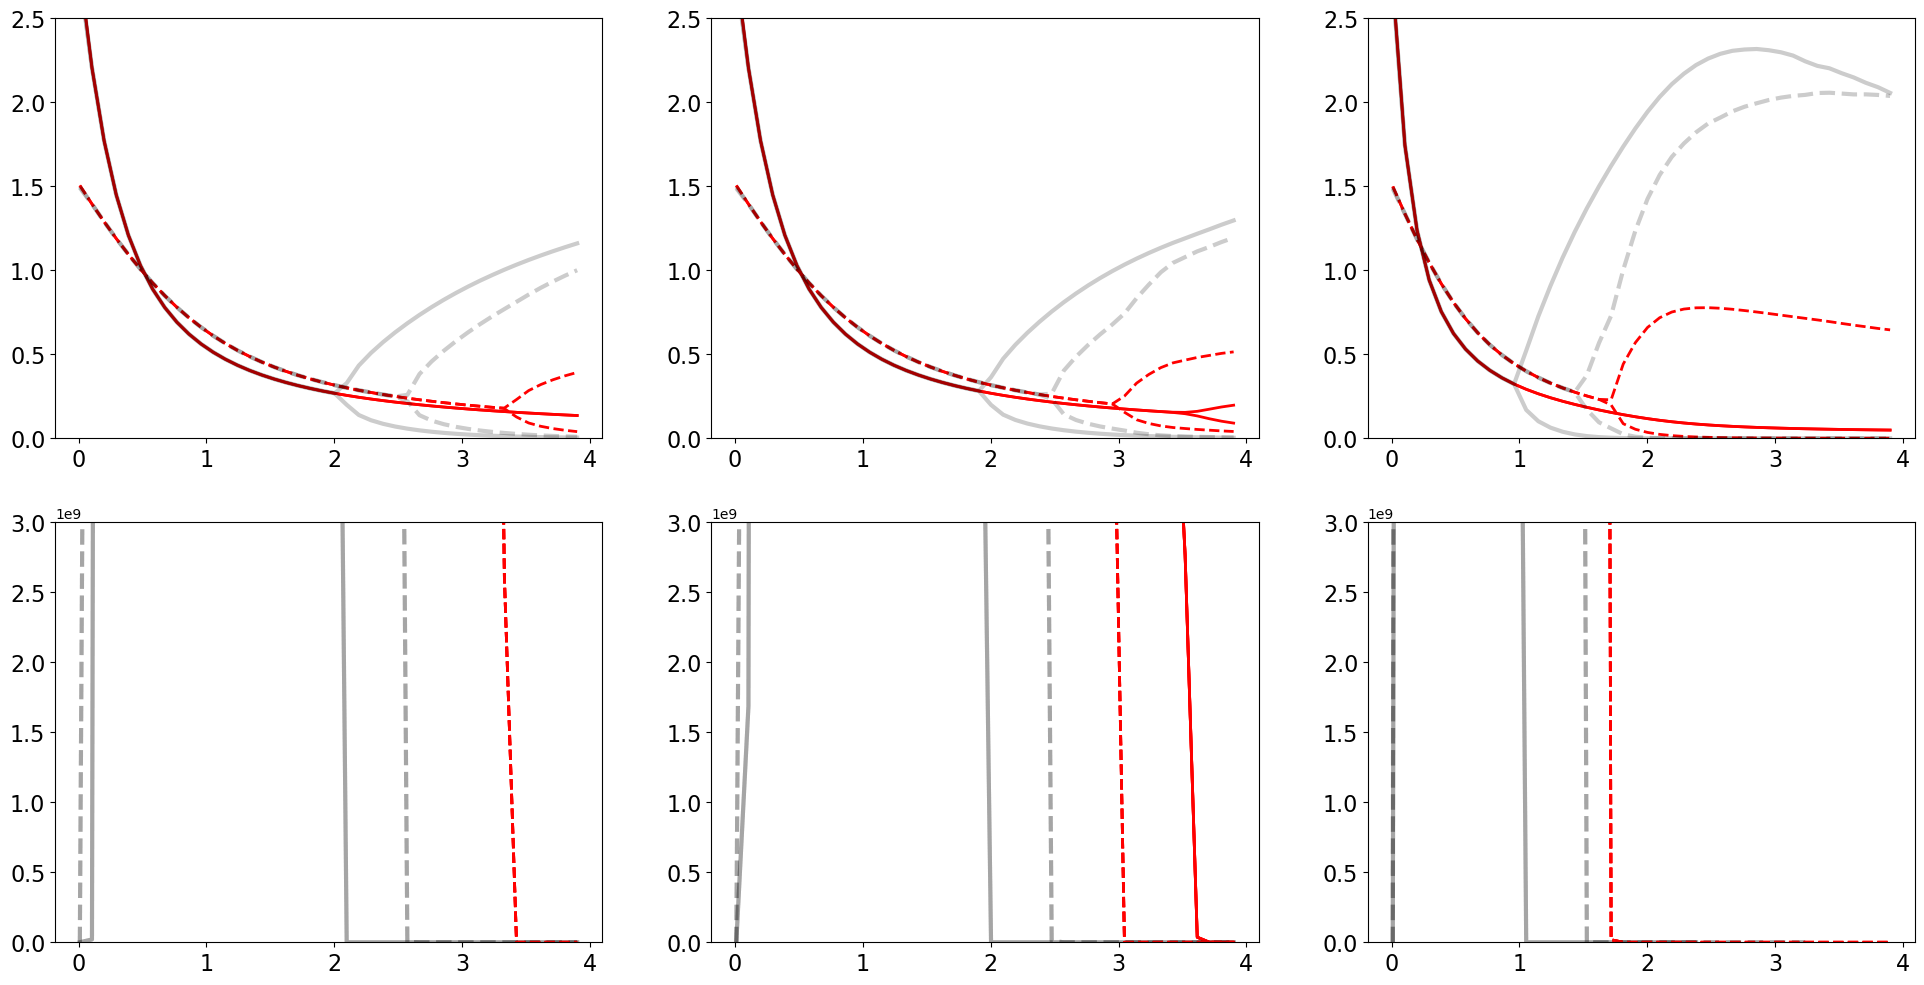

In [47]:
##################
###   PLOTS   ####
##################

### autotroph stocks and stochastic stability ###


#subfolder='auto_eng'

pd.options.mode.chained_assignment = None
bigD=1
bigJ=0

### spatial parameters
het=0
#connect=array([[-0.5,0.5],[0.5,-0.5]]) # between patches
connect=array([0])
#connect=array([[0,0],[0,0]]) # between patches
flow=array([0,0,0,0]) # for each compartment
patchnbr= len(connect)
ecodim= len(flow)#len(pr_sp['r'])
nutrient=0 # the nutrient compartment is the first position
detritus=ecodim-1 # the detritus compartment is at the last position


parfile='recengScenario.csv'
datafile='recengDB.csv'
#folder = ''.join(['./',subfolder,'/'])  
path_data='./data/'
path_params='./params/'
path_fig='./fig/'
isdir = os.path.isdir(path_fig)
if isdir==False: os.mkdir(path_fig)

lstyle=['-','--','-.']
transp=[1,0.2,0.1]
linewidth=[2,3,4]
clr=['r','k','b']

fig, axs = plt.subplots(2,3,figsize=(24,12))


#order=[ecodim,patchnbr,len(yVal),len(yVal[0]),gd['eg_0']] # order: (0) row, (1) column, (2) sets of variables, (3)  variables, (4) series

target=1 # index of plotted species
var_ind=(target+1)*(1+ecodim)-ecodim

# first column (full recycling)

fltr=pd.DataFrame({'scenario_3':[0],'scenario_0':[0]})
gd=query(fltr)
yVal=[['minCtr','maxCtr'],['minAdj','maxAdj']]
order=[ecodim,patchnbr,len(yVal),len(yVal[0]),gd['eg_0']] # order: (0) row, (1) column, (2) sets of variables, (3)  variables, (4) series


for k in range(order[2]): # ctr vs adj
            for l in range(order[3]): # min,max
                st=0
                for m in unique(order[4]): # with or without engineering
                    axs[0][0].plot(gd[gd.eg_0==m].eta_0, gd[gd.eg_0==m]['_'.join([yVal[k][l],str(target)])],ls=lstyle[st],color=clr[k],alpha=transp[k],linewidth=linewidth[k]) 
                    axs[1][0].plot(gd[gd.eg_0==m].eta_0,(gd[gd.eg_0==m]['_'.join(['Xstoch',str(target)])]/gd[gd.eg_0==m]['_'.join(['Xcov',str(var_ind-1)])]),ls=lstyle[st],color=clr[0],alpha=transp[0],linewidth=linewidth[0])
                    axs[1][0].plot(gd[gd.eg_0==m].eta_0,(gd[gd.eg_0==m]['_'.join(['XstochAdj',str(target)])]/gd[gd.eg_0==m]['_'.join(['XcovAdj',str(var_ind-1)])]),ls=lstyle[st],color=clr[1],alpha=transp[2],linewidth=linewidth[1])
                    st+=1

# second column (decomposition only)

fltr=pd.DataFrame({'scenario_3':[1],'scenario_0':[0]})
gd=query(fltr)
yVal=[['minCtr','maxCtr'],['minAdj','maxAdj']]
order=[ecodim,patchnbr,len(yVal),len(yVal[0]),gd['eg_0']] # order: (0) row, (1) column, (2) sets of variables, (3)  variables, (4) series


for k in range(order[2]): # ctr vs adj
            for l in range(order[3]): # min,max
                st=0
                for m in unique(order[4]): # with or without engineering
                    axs[0][1].plot(gd[gd.eg_0==m].eta_0, gd[gd.eg_0==m]['_'.join([yVal[k][l],str(target)])],ls=lstyle[st],color=clr[k],alpha=transp[k],linewidth=linewidth[k]) 
                    axs[1][1].plot(gd[gd.eg_0==m].eta_0,(gd[gd.eg_0==m]['_'.join(['Xstoch',str(target)])]/gd[gd.eg_0==m]['_'.join(['Xcov',str(var_ind-1)])]),ls=lstyle[st],color=clr[0],alpha=transp[0],linewidth=linewidth[0])
                    axs[1][1].plot(gd[gd.eg_0==m].eta_0,(gd[gd.eg_0==m]['_'.join(['XstochAdj',str(target)])]/gd[gd.eg_0==m]['_'.join(['XcovAdj',str(var_ind-1)])]),ls=lstyle[st],color=clr[1],alpha=transp[2],linewidth=linewidth[1])
                    st+=1
#third column (no recycling)

fltr=pd.DataFrame({'scenario_3':[1],'scenario_0':[1]})
gd=query(fltr)
yVal=[['minCtr','maxCtr'],['minAdj','maxAdj']]
order=[ecodim,patchnbr,len(yVal),len(yVal[0]),gd['eg_0']] # order: (0) row, (1) column, (2) sets of variables, (3)  variables, (4) series


for k in range(order[2]): # ctr vs adj
            for l in range(order[3]): # min,max
                st=0
                for m in unique(order[4]): # with or without engineering
                    axs[0][2].plot(gd[gd.eg_0==m].eta_0, gd[gd.eg_0==m]['_'.join([yVal[k][l],str(target)])],ls=lstyle[st],color=clr[k],alpha=transp[k],linewidth=linewidth[k]) 
                    axs[1][2].plot(gd[gd.eg_0==m].eta_0,(gd[gd.eg_0==m]['_'.join(['Xstoch',str(target)])]/gd[gd.eg_0==m]['_'.join(['Xcov',str(var_ind-1)])]),ls=lstyle[st],color=clr[0],alpha=transp[0],linewidth=linewidth[0])
                    axs[1][2].plot(gd[gd.eg_0==m].eta_0,(gd[gd.eg_0==m]['_'.join(['XstochAdj',str(target)])]/gd[gd.eg_0==m]['_'.join(['XcovAdj',str(var_ind-1)])]),ls=lstyle[st],color=clr[1],alpha=transp[2],linewidth=linewidth[1])
                    st+=1



for j in range(3):
    for i in range(2):
        axs[0][j].set_ylim([0,2.5])
        axs[1][j].set_ylim([0,3000000000])
        axs[i][j].xaxis.label.set_size(18)
        axs[i][j].yaxis.label.set_size(16)
        axs[i][j].xaxis.set_tick_params(labelsize=16)
        axs[i][j].yaxis.set_tick_params(labelsize=16)

fig.savefig(''.join([path_fig,'receng_A_stoch_stab.pdf']),bbox_inches='tight')

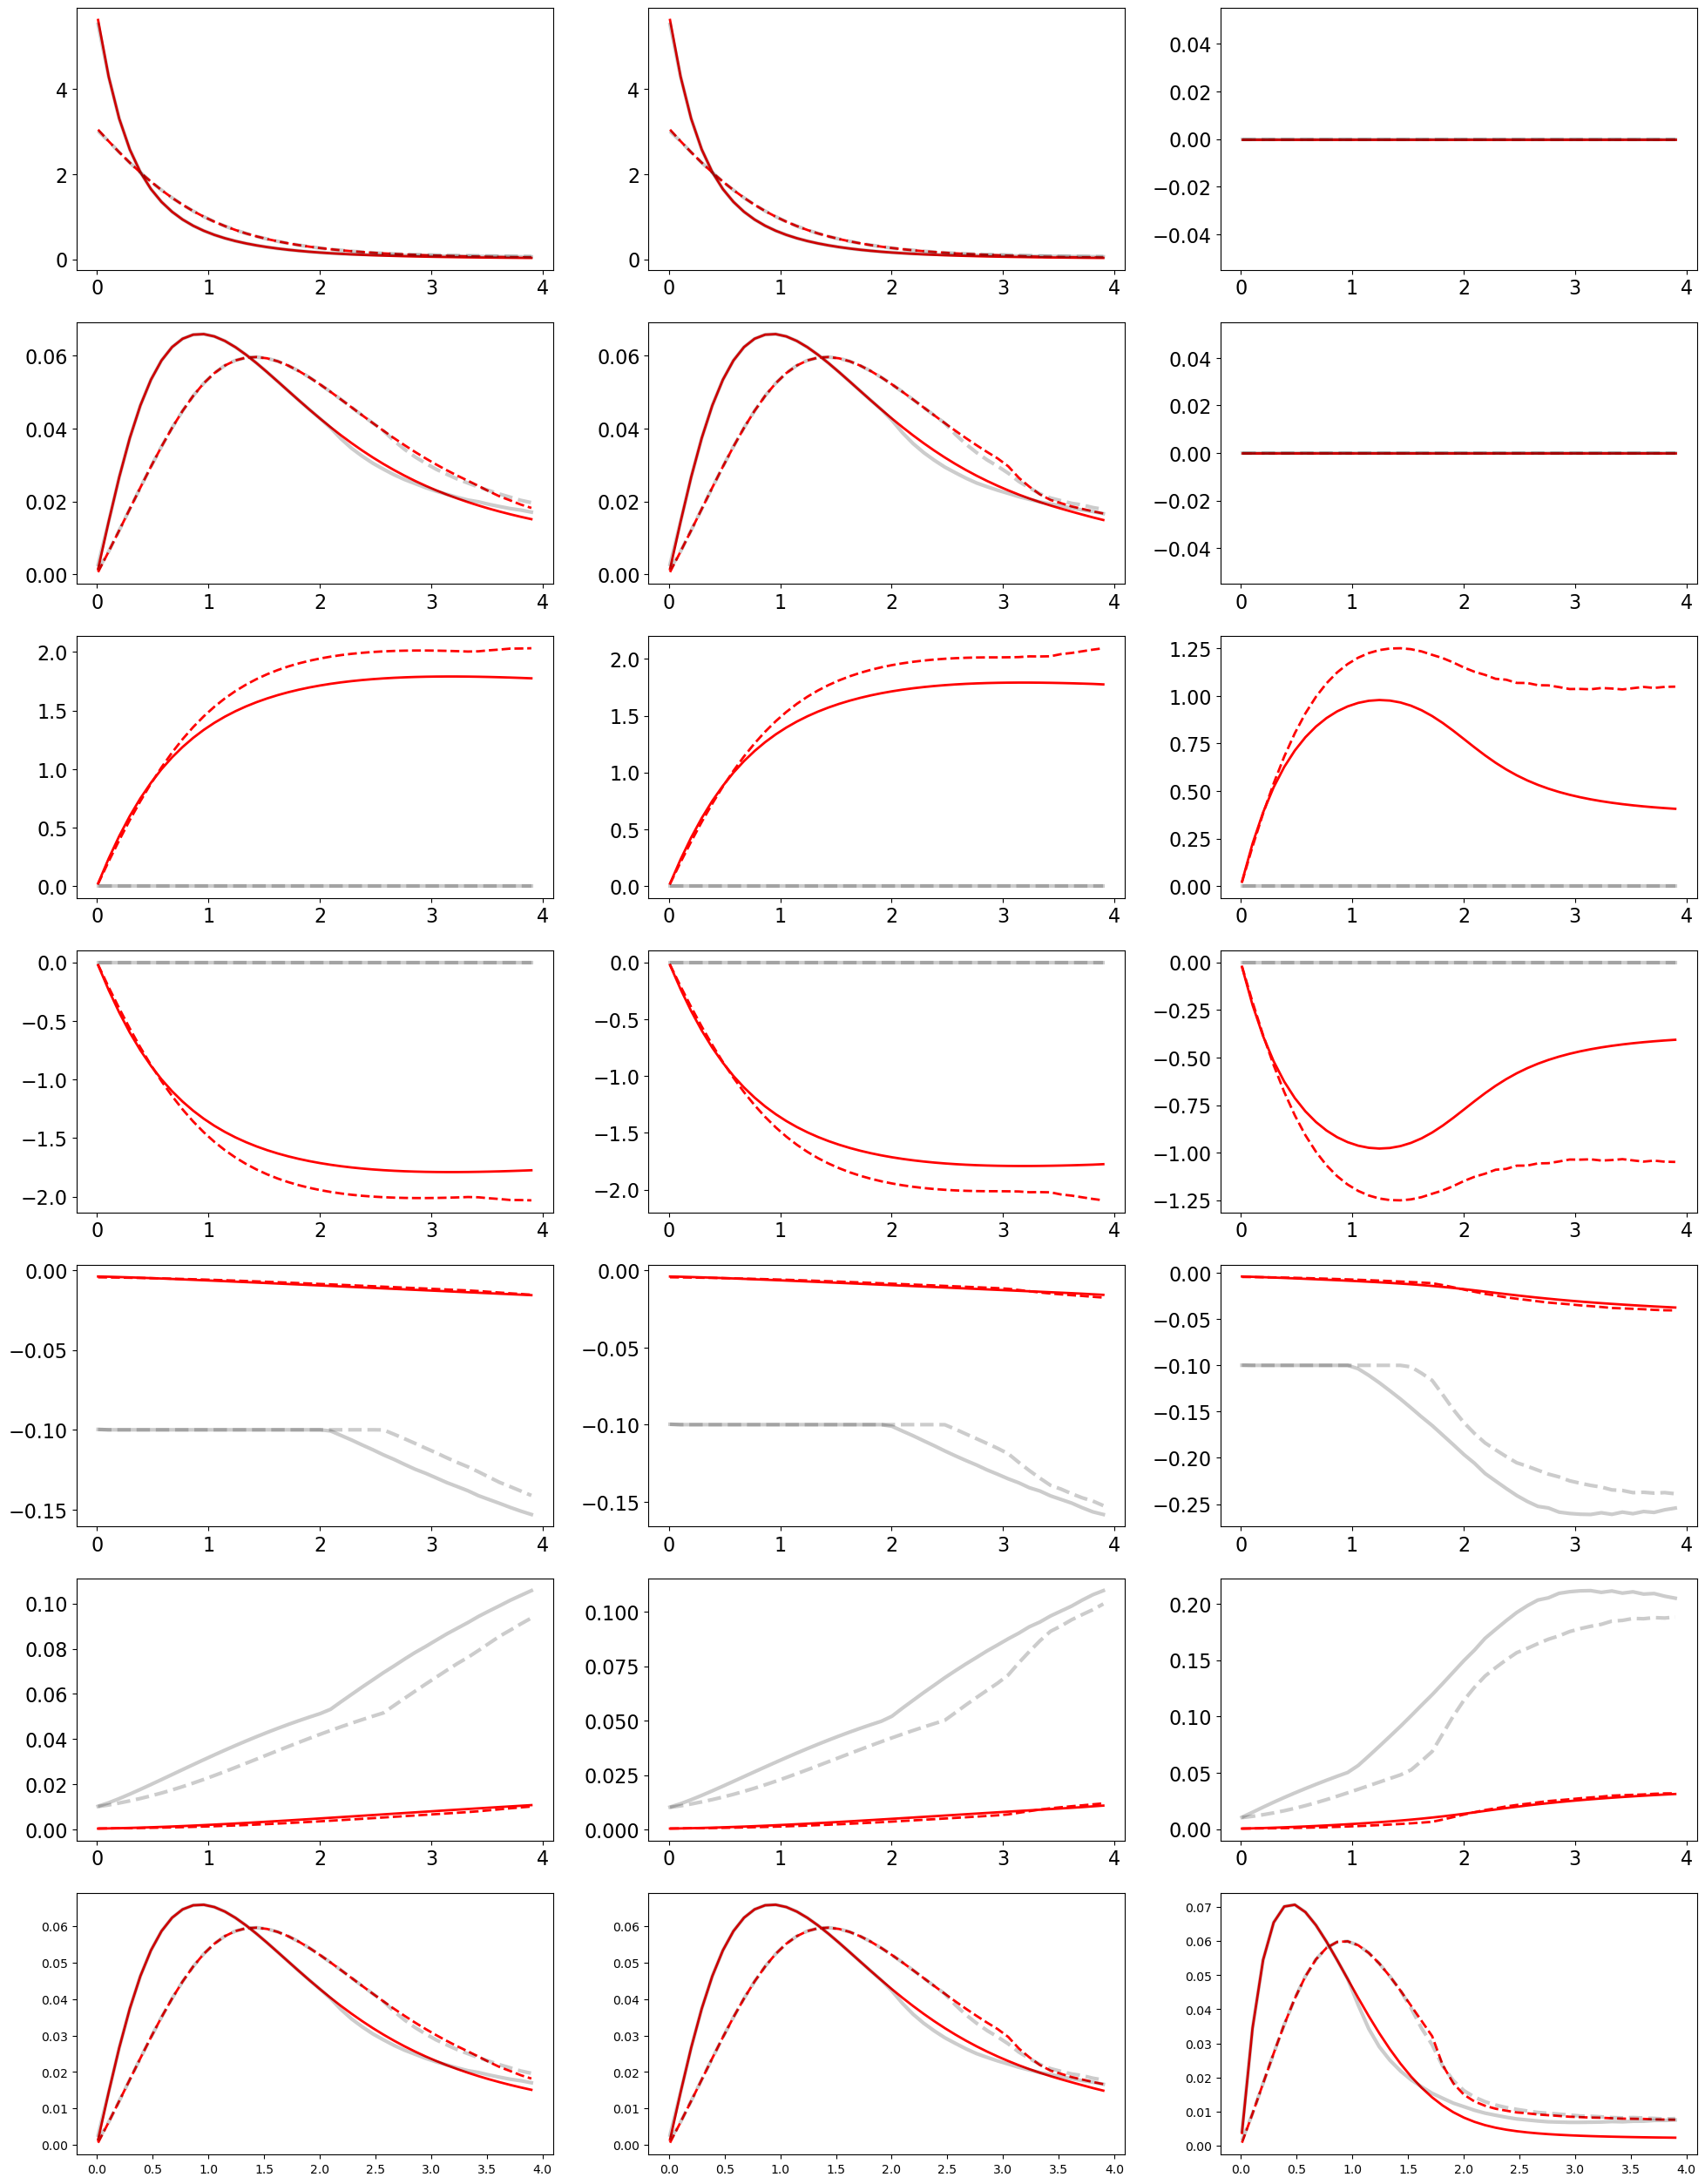

In [48]:
##################
###   PLOTS   ####
##################

##### Consumer jacobian ########

#subfolder='auto_eng'

pd.options.mode.chained_assignment = None
bigD=1
bigJ=0

### spatial parameters
het=0
#connect=array([[-0.5,0.5],[0.5,-0.5]]) # between patches
connect=array([0])
#connect=array([[0,0],[0,0]]) # between patches
flow=array([0,0,0,0]) # for each compartment
patchnbr= len(connect)
ecodim= len(flow)#len(pr_sp['r'])
nutrient=0 # the nutrient compartment is the first position
detritus=ecodim-1 # the detritus compartment is at the last position


parfile='recengScenario.csv'
datafile='recengDB.csv'
#folder = ''.join(['./',subfolder,'/'])  
path_data='./data/'
path_params='./params/'
path_fig='./fig/'
isdir = os.path.isdir(path_fig)
if isdir==False: os.mkdir(path_fig)

lstyle=['-','--','-.']
transp=[1,0.2,0.1]
linewidth=[2,3,4]
clr=['r','k','b']

#dfF=pd.DataFrame({'':[],'':[],'':[]})


#yVal=[[gd.jacAll_12*gd.jacAll_1,gd.jacAllAdj_12*gd.jacAllAdj_1], # from detritus to autotroph
##    [gd.jacAll_12*gd.jacAll_1*gd.jacAll_6,gd.jacAllAdj_12*gd.jacAllAdj_1*gd.jacAllAdj_6], # from detritus to consumer
 #   [gd.jacAll_14,gd.jacAllAdj_14], # HOI regulation on consumer
 #   [gd.jacAll_13,gd.jacAllAdj_13], # HOI regulation on autotroph
 #   [gd.jacAll_9,gd.jacAllAdj_9], # top-down consumer->producer regulation
 #   [gd.jacAll_9*gd.jacAll_4,gd.jacAllAdj_9*gd.jacAllAdj_4], # top-down consumer->nutrient regulation
 #   [gd.jacAll_6*gd.jacAll_1,gd.jacAllAdj_6*gd.jacAllAdj_1]
 #   ] # Bottom-up from nutrient to consumer

#fig, axs = plt.subplots(len(yVal),3,figsize=(24,14))


#order=[ecodim,patchnbr,len(yVal),len(yVal[0]),gd['eg_0']] # order: (0) row, (1) column, (2) sets of variables, (3)  variables, (4) series

target=2 # index of plotted species
var_ind=(target+1)*(1+ecodim)-ecodim

# first column (full recycling)

fltr=pd.DataFrame({'scenario_3':[0],'scenario_0':[0]})
gd=query(fltr)

yVal=[[gd.jacAll_12*gd.jacAll_1,gd.jacAllAdj_12*gd.jacAllAdj_1], # from detritus to autotroph
    [gd.jacAll_12*gd.jacAll_1*gd.jacAll_6,gd.jacAllAdj_12*gd.jacAllAdj_1*gd.jacAllAdj_6], # from detritus to consumer
    [gd.jacAll_14,gd.jacAllAdj_14], # HOI regulation on consumer
    [gd.jacAll_13,gd.jacAllAdj_13], # HOI regulation on autotroph
    [gd.jacAll_9,gd.jacAllAdj_9], # top-down consumer->producer regulation
    [gd.jacAll_9*gd.jacAll_4,gd.jacAllAdj_9*gd.jacAllAdj_4], # top-down consumer->nutrient regulation
    [gd.jacAll_6*gd.jacAll_1,gd.jacAllAdj_6*gd.jacAllAdj_1]
    ] # Bottom-up from nutrient to consumer
order=[ecodim,patchnbr,len(yVal),len(yVal[0]),gd['eg_0']] # order: (0) row, (1) column, (2) sets of variables, (3)  variables, (4) series
fig, axs = plt.subplots(len(yVal),3,figsize=(24,32))

for k in range(order[3]): # ctr vs adj
            for l in range(order[2]): # jac coefficients
                st=0
                for m in unique(order[4]): # with or without engineering
                    axs[l][0].plot(gd[gd.eg_0==m].eta_0,  yVal[l][k][gd.eg_0==m],ls=lstyle[st],color=clr[k],alpha=transp[k],linewidth=linewidth[k]) 
                   # axs[l][0].plot(gd[gd.eg_0==m].eta_0,(gd[gd.eg_0==m]['_'.join(['Xstoch',str(target)])]/gd[gd.eg_0==m]['_'.join(['Xcov',str(var_ind-1)])]),ls=lstyle[st],color=clr[0],alpha=transp[0],linewidth=linewidth[0])
                   # axs[1][0].plot(gd[gd.eg_0==m].eta_0,(gd[gd.eg_0==m]['_'.join(['XstochAdj',str(target)])]/gd[gd.eg_0==m]['_'.join(['XcovAdj',str(var_ind-1)])]),ls=lstyle[st],color=clr[1],alpha=transp[2],linewidth=linewidth[1])
                    st+=1

# second column (decomposition only)

fltr=pd.DataFrame({'scenario_3':[1],'scenario_0':[0]})
gd=query(fltr)

yVal=[[gd.jacAll_12*gd.jacAll_1,gd.jacAllAdj_12*gd.jacAllAdj_1], # from detritus to autotroph
    [gd.jacAll_12*gd.jacAll_1*gd.jacAll_6,gd.jacAllAdj_12*gd.jacAllAdj_1*gd.jacAllAdj_6], # from detritus to consumer
    [gd.jacAll_14,gd.jacAllAdj_14], # HOI regulation on consumer
    [gd.jacAll_13,gd.jacAllAdj_13], # HOI regulation on autotroph
    [gd.jacAll_9,gd.jacAllAdj_9], # top-down consumer->producer regulation
    [gd.jacAll_9*gd.jacAll_4,gd.jacAllAdj_9*gd.jacAllAdj_4], # top-down consumer->nutrient regulation
    [gd.jacAll_6*gd.jacAll_1,gd.jacAllAdj_6*gd.jacAllAdj_1]
    ] # Bottom-up from nutrient to consumer
order=[ecodim,patchnbr,len(yVal),len(yVal[0]),gd['eg_0']] # order: (0) row, (1) column, (2) sets of variables, (3)  variables, (4) series

for k in range(order[3]): # ctr vs adj
            for l in range(order[2]): # jac coefficients
                st=0
                for m in unique(order[4]): # with or without engineering
                    axs[l][1].plot(gd[gd.eg_0==m].eta_0,  yVal[l][k][gd.eg_0==m],ls=lstyle[st],color=clr[k],alpha=transp[k],linewidth=linewidth[k]) 
                   # axs[l][0].plot(gd[gd.eg_0==m].eta_0,(gd[gd.eg_0==m]['_'.join(['Xstoch',str(target)])]/gd[gd.eg_0==m]['_'.join(['Xcov',str(var_ind-1)])]),ls=lstyle[st],color=clr[0],alpha=transp[0],linewidth=linewidth[0])
                   # axs[1][0].plot(gd[gd.eg_0==m].eta_0,(gd[gd.eg_0==m]['_'.join(['XstochAdj',str(target)])]/gd[gd.eg_0==m]['_'.join(['XcovAdj',str(var_ind-1)])]),ls=lstyle[st],color=clr[1],alpha=transp[2],linewidth=linewidth[1])
                    st+=1
                    
#third column (no recycling)

fltr=pd.DataFrame({'scenario_3':[1],'scenario_0':[1]})
gd=query(fltr)

yVal=[[gd.jacAll_12*gd.jacAll_1,gd.jacAllAdj_12*gd.jacAllAdj_1], # from detritus to autotroph
    [gd.jacAll_12*gd.jacAll_1*gd.jacAll_6,gd.jacAllAdj_12*gd.jacAllAdj_1*gd.jacAllAdj_6], # from detritus to consumer
    [gd.jacAll_14,gd.jacAllAdj_14], # HOI regulation on consumer
    [gd.jacAll_13,gd.jacAllAdj_13], # HOI regulation on autotroph
    [gd.jacAll_9,gd.jacAllAdj_9], # top-down consumer->producer regulation
    [gd.jacAll_9*gd.jacAll_4,gd.jacAllAdj_9*gd.jacAllAdj_4], # top-down consumer->nutrient regulation
    [gd.jacAll_6*gd.jacAll_1,gd.jacAllAdj_6*gd.jacAllAdj_1]
    ] # Bottom-up from nutrient to consumer
order=[ecodim,patchnbr,len(yVal),len(yVal[0]),gd['eg_0']] # order: (0) row, (1) column, (2) sets of variables, (3)  variables, (4) series

for k in range(order[3]): # ctr vs adj
            for l in range(order[2]): # jac coefficients
                st=0
                for m in unique(order[4]): # with or without engineering
                    axs[l][2].plot(gd[gd.eg_0==m].eta_0,  yVal[l][k][gd.eg_0==m],ls=lstyle[st],color=clr[k],alpha=transp[k],linewidth=linewidth[k]) 
                   # axs[l][0].plot(gd[gd.eg_0==m].eta_0,(gd[gd.eg_0==m]['_'.join(['Xstoch',str(target)])]/gd[gd.eg_0==m]['_'.join(['Xcov',str(var_ind-1)])]),ls=lstyle[st],color=clr[0],alpha=transp[0],linewidth=linewidth[0])
                   # axs[1][0].plot(gd[gd.eg_0==m].eta_0,(gd[gd.eg_0==m]['_'.join(['XstochAdj',str(target)])]/gd[gd.eg_0==m]['_'.join(['XcovAdj',str(var_ind-1)])]),ls=lstyle[st],color=clr[1],alpha=transp[2],linewidth=linewidth[1])
                    st+=1



for j in range(3):
    for i in range(6):
       # axs[0][j].set_ylim([0,2])
       # axs[1][j].set_ylim([0,21000000])
        axs[i][j].xaxis.label.set_size(24)
        axs[i][j].yaxis.label.set_size(24)
        axs[i][j].xaxis.set_tick_params(labelsize=16)
        axs[i][j].yaxis.set_tick_params(labelsize=16)

fig.savefig(''.join([path_fig,'receng_stoch_jac2.pdf']),bbox_inches='tight')

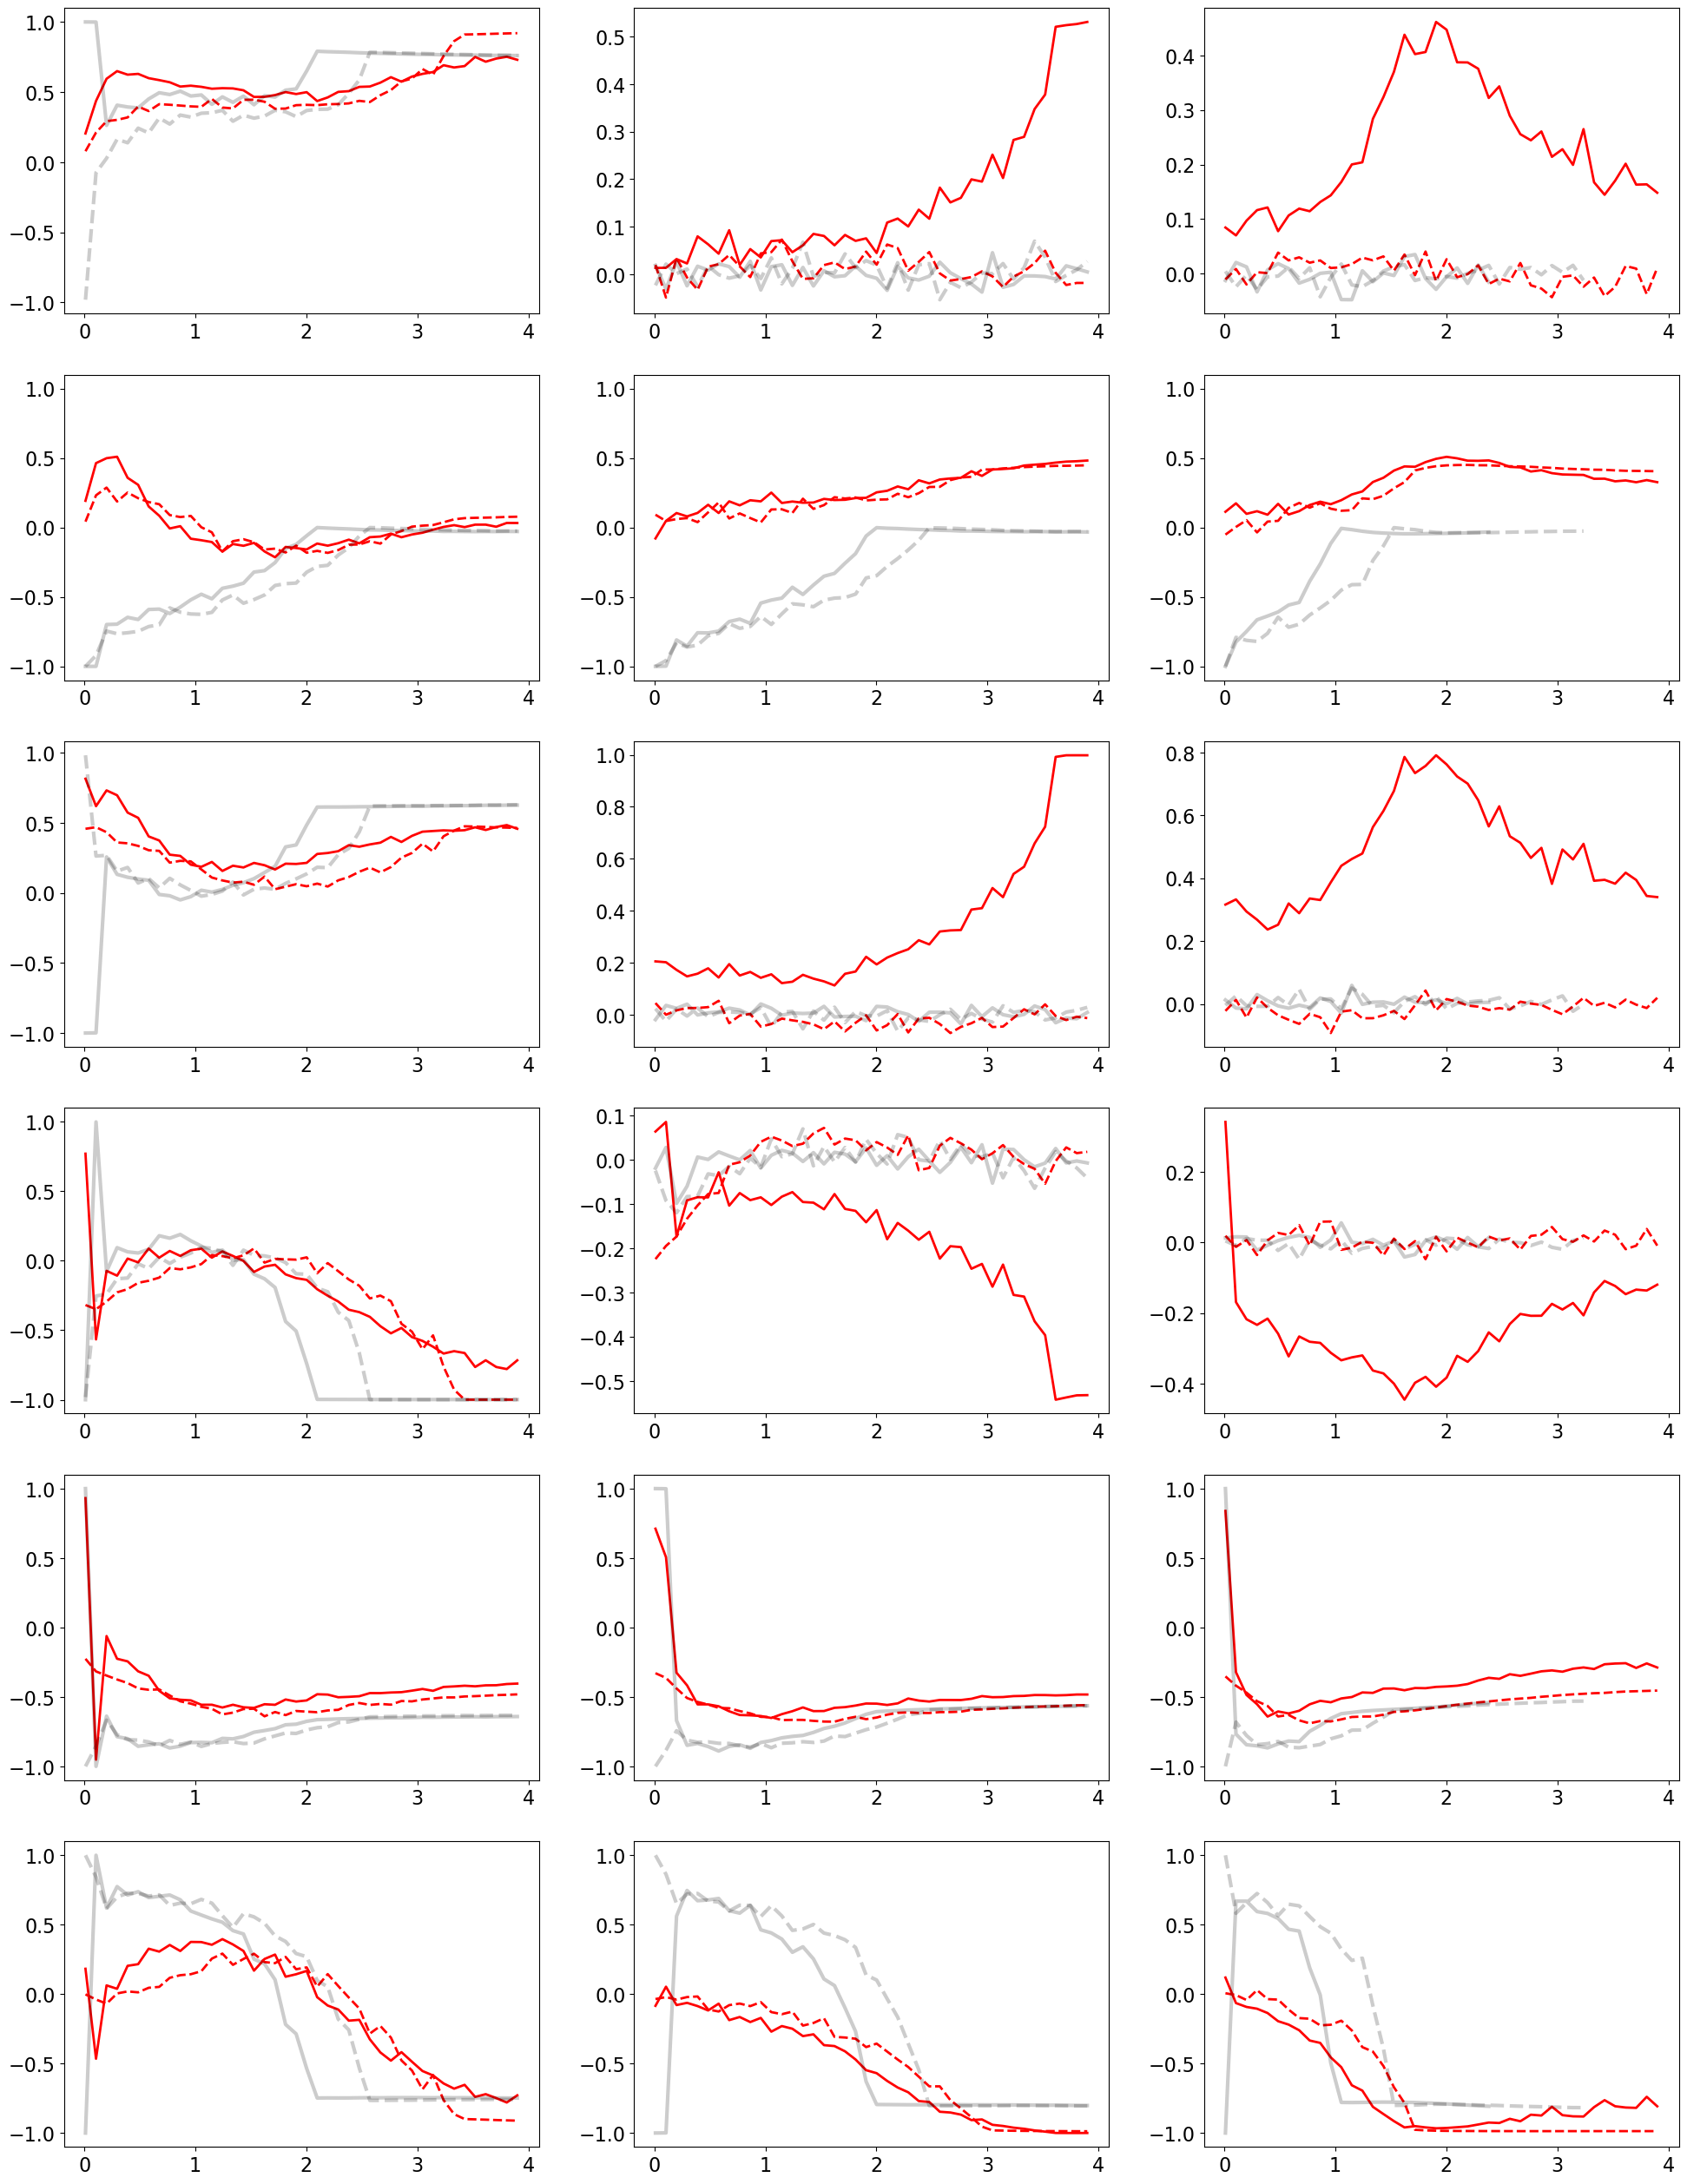

In [51]:
##################
###   PLOTS   ####
##################

##### Consumer correlations ########

#subfolder='auto_eng'

pd.options.mode.chained_assignment = None
bigD=1
bigJ=0

### spatial parameters
het=0
#connect=array([[-0.5,0.5],[0.5,-0.5]]) # between patches
connect=array([0])
#connect=array([[0,0],[0,0]]) # between patches
flow=array([0,0,0,0]) # for each compartment
patchnbr= len(connect)
ecodim= len(flow)#len(pr_sp['r'])
nutrient=0 # the nutrient compartment is the first position
detritus=ecodim-1 # the detritus compartment is at the last position


parfile='recengScenario.csv'
datafile='recengDB.csv'
#folder = ''.join(['./',subfolder,'/'])  
path_data='./data/'
path_params='./params/'
path_fig='./fig/'
isdir = os.path.isdir(path_fig)
if isdir==False: os.mkdir(path_fig)

lstyle=['-','--','-.']
transp=[1,0.2,0.1]
linewidth=[2,3,4]
clr=['r','k','b']

#dfF=pd.DataFrame({'':[],'':[],'':[]})


yVal=[[gd.Xcov_14/sqrt(gd.Xcov_10*gd.Xcov_15),gd.XcovAdj_14/sqrt(gd.XcovAdj_10*gd.XcovAdj_15)], # detritus<->consumer
    [gd.Xcov_9/sqrt(gd.Xcov_10*gd.Xcov_5),gd.XcovAdj_9/sqrt(gd.XcovAdj_10*gd.XcovAdj_5)], # consumer<->producer
    [gd.Xcov_13/sqrt(gd.Xcov_5*gd.Xcov_15),gd.XcovAdj_13/sqrt(gd.XcovAdj_5*gd.XcovAdj_15)], # detritus<->producer
    [gd.Xcov_12/sqrt(gd.Xcov_0*gd.Xcov_15),gd.XcovAdj_12/sqrt(gd.XcovAdj_0*gd.XcovAdj_15)], # detritus<->nutrient
    [gd.Xcov_4/sqrt(gd.Xcov_0*gd.Xcov_5),gd.XcovAdj_4/sqrt(gd.XcovAdj_0*gd.XcovAdj_5)], # producer<->nutrient
    [gd.Xcov_8/sqrt(gd.Xcov_10*gd.Xcov_0),gd.XcovAdj_8/sqrt(gd.XcovAdj_10*gd.XcovAdj_0)]] # nutrient<->consumer

fig, axs = plt.subplots(len(yVal),3,figsize=(24,32))


order=[ecodim,patchnbr,len(yVal),len(yVal[0]),gd['eg_0']] # order: (0) row, (1) column, (2) sets of variables, (3)  variables, (4) series

target=2 # index of plotted species
var_ind=(target+1)*(1+ecodim)-ecodim

# first column (full recycling)

fltr=pd.DataFrame({'scenario_3':[0],'scenario_0':[0]})
gd=query(fltr)

yVal=[[gd.Xcov_14/sqrt(gd.Xcov_10*gd.Xcov_15),gd.XcovAdj_14/sqrt(gd.XcovAdj_10*gd.XcovAdj_15)], # detritus<->consumer
    [gd.Xcov_9/sqrt(gd.Xcov_10*gd.Xcov_5),gd.XcovAdj_9/sqrt(gd.XcovAdj_10*gd.XcovAdj_5)], # consumer<->producer
    [gd.Xcov_13/sqrt(gd.Xcov_5*gd.Xcov_15),gd.XcovAdj_13/sqrt(gd.XcovAdj_5*gd.XcovAdj_15)], # detritus<->producer
    [gd.Xcov_12/sqrt(gd.Xcov_0*gd.Xcov_15),gd.XcovAdj_12/sqrt(gd.XcovAdj_0*gd.XcovAdj_15)], # detritus<->nutrient
    [gd.Xcov_4/sqrt(gd.Xcov_0*gd.Xcov_5),gd.XcovAdj_4/sqrt(gd.XcovAdj_0*gd.XcovAdj_5)], # producer<->nutrient
    [gd.Xcov_8/sqrt(gd.Xcov_10*gd.Xcov_0),gd.XcovAdj_8/sqrt(gd.XcovAdj_10*gd.XcovAdj_0)]] # nutrient<->consumer

for k in range(order[3]): # ctr vs adj
            for l in range(order[2]): # jac coefficients
                st=0
                for m in unique(order[4]): # with or without engineering
                    axs[l][0].plot(gd[gd.eg_0==m].eta_0,  yVal[l][k][gd.eg_0==m],ls=lstyle[st],color=clr[k],alpha=transp[k],linewidth=linewidth[k]) 
                   # axs[l][0].plot(gd[gd.eg_0==m].eta_0,(gd[gd.eg_0==m]['_'.join(['Xstoch',str(target)])]/gd[gd.eg_0==m]['_'.join(['Xcov',str(var_ind-1)])]),ls=lstyle[st],color=clr[0],alpha=transp[0],linewidth=linewidth[0])
                   # axs[1][0].plot(gd[gd.eg_0==m].eta_0,(gd[gd.eg_0==m]['_'.join(['XstochAdj',str(target)])]/gd[gd.eg_0==m]['_'.join(['XcovAdj',str(var_ind-1)])]),ls=lstyle[st],color=clr[1],alpha=transp[2],linewidth=linewidth[1])
                    st+=1

# second column (decomposition only)

fltr=pd.DataFrame({'scenario_3':[1],'scenario_0':[0]})
gd=query(fltr)

yVal=[[gd.Xcov_14/sqrt(gd.Xcov_10*gd.Xcov_15),gd.XcovAdj_14/sqrt(gd.XcovAdj_10*gd.XcovAdj_15)], # detritus<->consumer
    [gd.Xcov_9/sqrt(gd.Xcov_10*gd.Xcov_5),gd.XcovAdj_9/sqrt(gd.XcovAdj_10*gd.XcovAdj_5)], # consumer<->producer
    [gd.Xcov_13/sqrt(gd.Xcov_5*gd.Xcov_15),gd.XcovAdj_13/sqrt(gd.XcovAdj_5*gd.XcovAdj_15)], # detritus<->producer
    [gd.Xcov_12/sqrt(gd.Xcov_0*gd.Xcov_15),gd.XcovAdj_12/sqrt(gd.XcovAdj_0*gd.XcovAdj_15)], # detritus<->nutrient
    [gd.Xcov_4/sqrt(gd.Xcov_0*gd.Xcov_5),gd.XcovAdj_4/sqrt(gd.XcovAdj_0*gd.XcovAdj_5)], # producer<->nutrient
    [gd.Xcov_8/sqrt(gd.Xcov_10*gd.Xcov_0),gd.XcovAdj_8/sqrt(gd.XcovAdj_10*gd.XcovAdj_0)]] # nutrient<->consumer

for k in range(order[3]): # ctr vs adj
            for l in range(order[2]): # jac coefficients
                st=0
                for m in unique(order[4]): # with or without engineering
                    axs[l][1].plot(gd[gd.eg_0==m].eta_0,  yVal[l][k][gd.eg_0==m],ls=lstyle[st],color=clr[k],alpha=transp[k],linewidth=linewidth[k]) 
                   # axs[l][0].plot(gd[gd.eg_0==m].eta_0,(gd[gd.eg_0==m]['_'.join(['Xstoch',str(target)])]/gd[gd.eg_0==m]['_'.join(['Xcov',str(var_ind-1)])]),ls=lstyle[st],color=clr[0],alpha=transp[0],linewidth=linewidth[0])
                   # axs[1][0].plot(gd[gd.eg_0==m].eta_0,(gd[gd.eg_0==m]['_'.join(['XstochAdj',str(target)])]/gd[gd.eg_0==m]['_'.join(['XcovAdj',str(var_ind-1)])]),ls=lstyle[st],color=clr[1],alpha=transp[2],linewidth=linewidth[1])
                    st+=1
                    
#third column (no recycling)

fltr=pd.DataFrame({'scenario_3':[1],'scenario_0':[1]})
gd=query(fltr)

yVal=[[gd.Xcov_14/sqrt(gd.Xcov_10*gd.Xcov_15),gd.XcovAdj_14/sqrt(gd.XcovAdj_10*gd.XcovAdj_15)], # detritus<->consumer
    [gd.Xcov_9/sqrt(gd.Xcov_10*gd.Xcov_5),gd.XcovAdj_9/sqrt(gd.XcovAdj_10*gd.XcovAdj_5)], # consumer<->producer
    [gd.Xcov_13/sqrt(gd.Xcov_5*gd.Xcov_15),gd.XcovAdj_13/sqrt(gd.XcovAdj_5*gd.XcovAdj_15)], # detritus<->producer
    [gd.Xcov_12/sqrt(gd.Xcov_0*gd.Xcov_15),gd.XcovAdj_12/sqrt(gd.XcovAdj_0*gd.XcovAdj_15)], # detritus<->nutrient
    [gd.Xcov_4/sqrt(gd.Xcov_0*gd.Xcov_5),gd.XcovAdj_4/sqrt(gd.XcovAdj_0*gd.XcovAdj_5)], # producer<->nutrient
    [gd.Xcov_8/sqrt(gd.Xcov_10*gd.Xcov_0),gd.XcovAdj_8/sqrt(gd.XcovAdj_10*gd.XcovAdj_0)]] # nutrient<->consumer

for k in range(order[3]): # ctr vs adj
            for l in range(order[2]): # jac coefficients
                st=0
                for m in unique(order[4]): # with or without engineering
                    axs[l][2].plot(gd[gd.eg_0==m].eta_0,  yVal[l][k][gd.eg_0==m],ls=lstyle[st],color=clr[k],alpha=transp[k],linewidth=linewidth[k]) 
                   # axs[l][0].plot(gd[gd.eg_0==m].eta_0,(gd[gd.eg_0==m]['_'.join(['Xstoch',str(target)])]/gd[gd.eg_0==m]['_'.join(['Xcov',str(var_ind-1)])]),ls=lstyle[st],color=clr[0],alpha=transp[0],linewidth=linewidth[0])
                   # axs[1][0].plot(gd[gd.eg_0==m].eta_0,(gd[gd.eg_0==m]['_'.join(['XstochAdj',str(target)])]/gd[gd.eg_0==m]['_'.join(['XcovAdj',str(var_ind-1)])]),ls=lstyle[st],color=clr[1],alpha=transp[2],linewidth=linewidth[1])
                    st+=1



for j in range(3):
    for i in range(6):
       # axs[0][j].set_ylim([0,2])
        axs[1][j].set_ylim([-1.1,1.1])
        axs[i][j].xaxis.label.set_size(24)
        axs[i][j].yaxis.label.set_size(24)
        axs[i][j].xaxis.set_tick_params(labelsize=16)
        axs[i][j].yaxis.set_tick_params(labelsize=16)

fig.savefig(''.join([path_fig,'receng_stoch_corr2.pdf']),bbox_inches='tight')

scenario_3
pr= Iadj0          0
Iadj1          0
Iadj2          0
Iadj3          0
lmdaAdj0       1
            ... 
troph_13     0.0
troph_14     0.0
troph_15     0.0
eta_0       0.01
eg_0         1.0
Name: 0, Length: 127, dtype: object


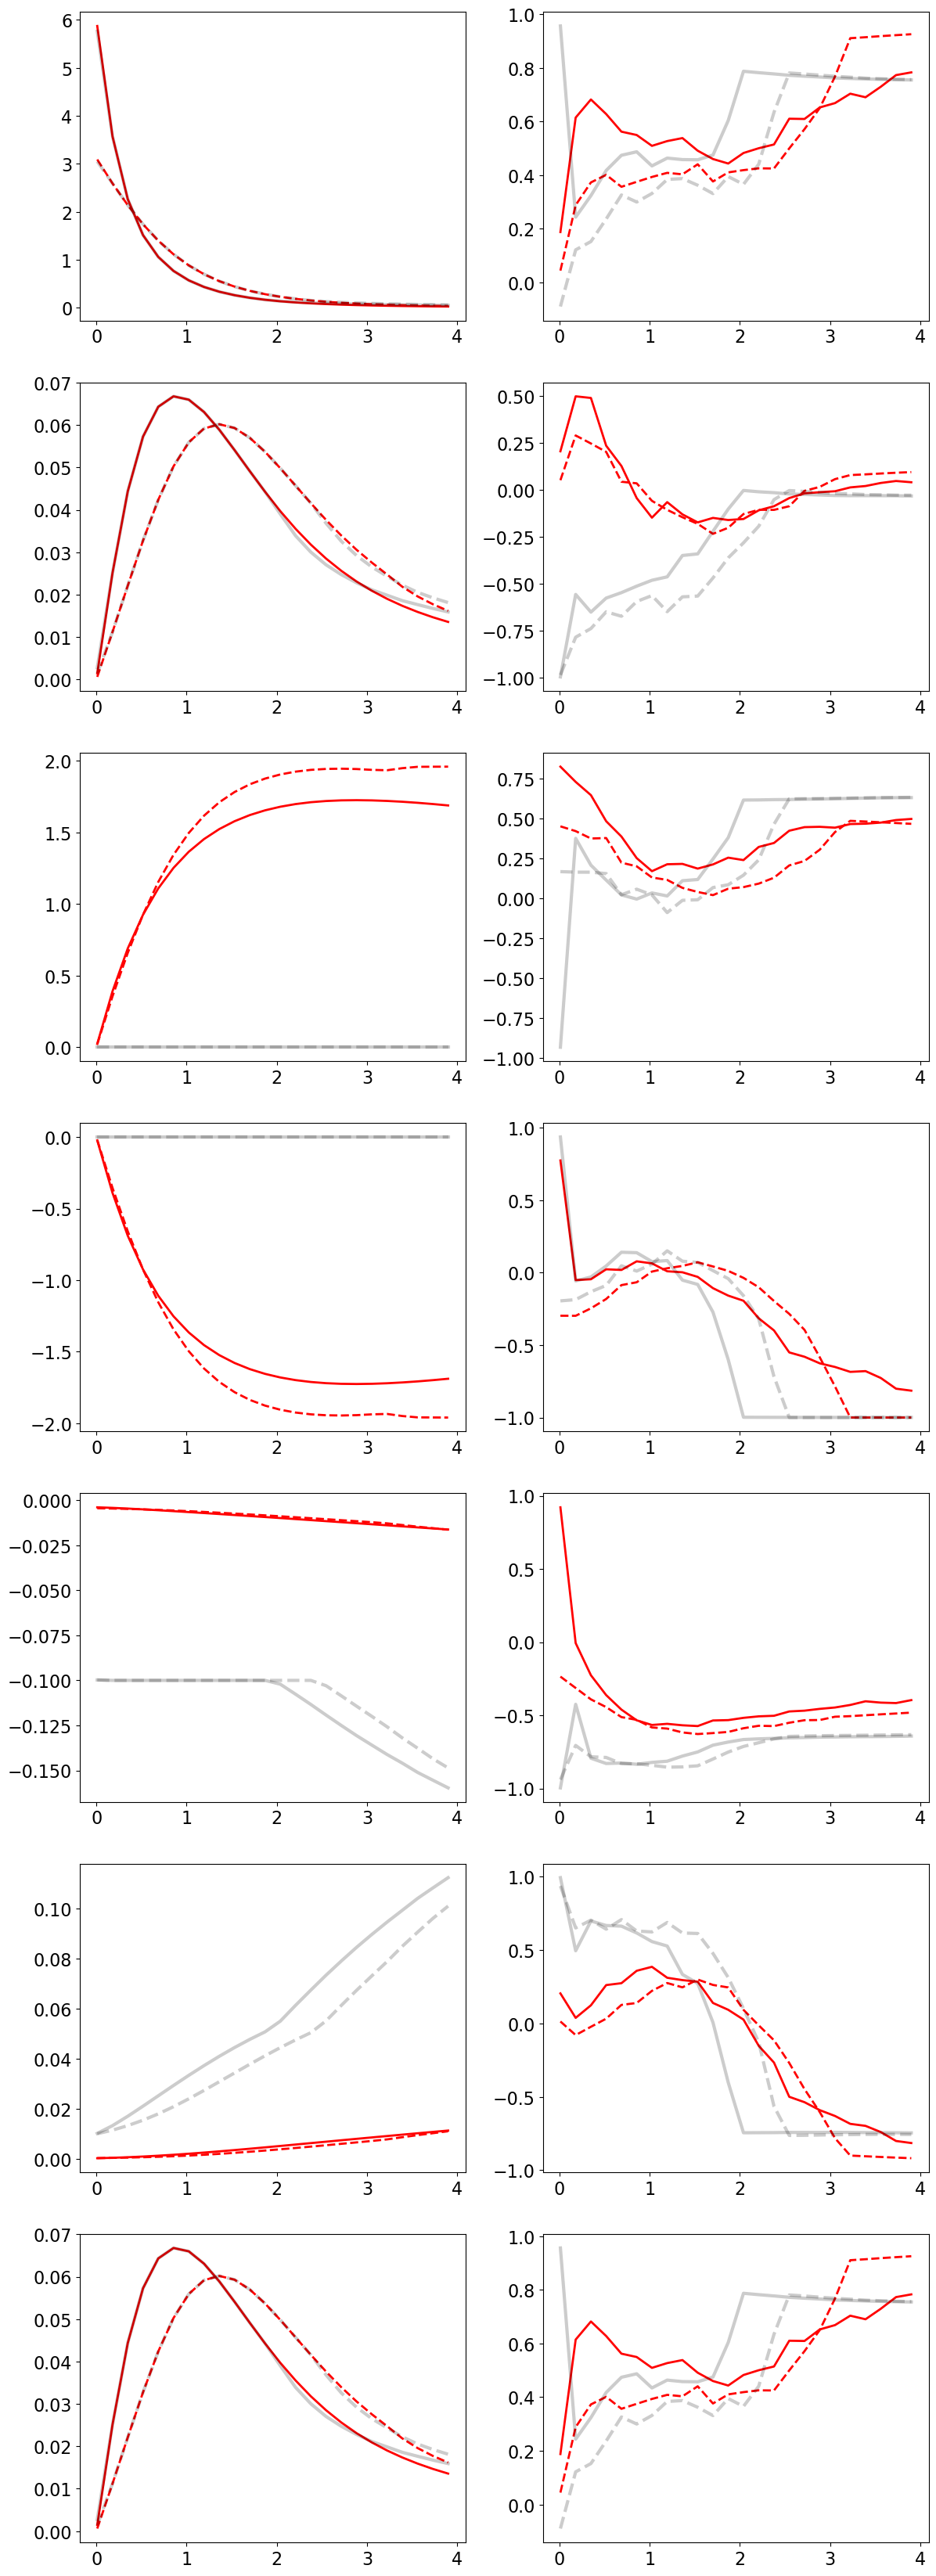

In [58]:
############################################
###   PLOTS Jacobians and correlations  ####
############################################

fltr=pd.DataFrame({'scenario_3':[0],'scenario_0':[0]})
gd=query(fltr)

#yVal=[[gd.jacAll_3*gd.jacAll_1,gd.jacAllAdj_3*gd.jacAllAdj_1], # from detritus to autotroph
#    [gd.jacAll_3*gd.jacAll_4*gd.jacAll_9,gd.jacAllAdj_3*gd.jacAllAdj_4*gd.jacAllAdj_9], # from detritus to consumer
#    [gd.jacAll_11,gd.jacAllAdj_11], # HOI regulation on consumer
#    [gd.jacAll_7,gd.jacAllAdj_7], # HOI regulation on autotroph
#    [gd.jacAll_6,gd.jacAllAdj_6]] # top-down regulation


yVal=[[gd.jacAll_12*gd.jacAll_1,gd.jacAllAdj_12*gd.jacAllAdj_1], # from detritus to autotroph
    [gd.jacAll_12*gd.jacAll_1*gd.jacAll_6,gd.jacAllAdj_12*gd.jacAllAdj_1*gd.jacAllAdj_6], # from detritus to consumer
    [gd.jacAll_14,gd.jacAllAdj_14], # HOI regulation on consumer
    [gd.jacAll_13,gd.jacAllAdj_13], # HOI regulation on autotroph
    [gd.jacAll_9,gd.jacAllAdj_9], # top-down consumer->producer regulation
    [gd.jacAll_9*gd.jacAll_4,gd.jacAllAdj_9*gd.jacAllAdj_4], # top-down consumer->nutrient regulation
    [gd.jacAll_6*gd.jacAll_1,gd.jacAllAdj_6*gd.jacAllAdj_1]] # Bottom-up from nutrient to consumer


fig, axs = plt.subplots(len(yVal),max(2,patchnbr),figsize=(14,42))

lstyle=['-','--','-.']
transp=[1,0.2,0.1]
linewidth=[2,3,4]
clr=['r','k','b']



order=[len(yVal),patchnbr,len(yVal[0]),gd['eg_0']] # order: (0) row, (1) column, (2)  variables, (3) series


for i in range(order[0]): # row
    for j in range(order[1]):    # column 
        for k in range(order[2]): # ctr vs adj
            st=0
            for m in unique(order[3]): # with or without engineering
                axs[i][j].plot(gd[gd.eg_0==m].eta_0, yVal[i][k][gd.eg_0==m],ls=lstyle[st],color=clr[k],alpha=transp[k],linewidth=linewidth[k]) 
                st+=1

yVal=[[gd.Xcov_14/sqrt(gd.Xcov_10*gd.Xcov_15),gd.XcovAdj_14/sqrt(gd.XcovAdj_10*gd.XcovAdj_15)], # detritus<->consumer
    [gd.Xcov_9/sqrt(gd.Xcov_10*gd.Xcov_5),gd.XcovAdj_9/sqrt(gd.XcovAdj_10*gd.XcovAdj_5)], # consumer<->producer
    [gd.Xcov_13/sqrt(gd.Xcov_5*gd.Xcov_15),gd.XcovAdj_13/sqrt(gd.XcovAdj_5*gd.XcovAdj_15)], # detritus<->producer
    [gd.Xcov_12/sqrt(gd.Xcov_0*gd.Xcov_15),gd.XcovAdj_12/sqrt(gd.XcovAdj_0*gd.XcovAdj_15)], # detritus<->nutrient
    [gd.Xcov_4/sqrt(gd.Xcov_0*gd.Xcov_5),gd.XcovAdj_4/sqrt(gd.XcovAdj_0*gd.XcovAdj_5)], # producer<->nutrient
    [gd.Xcov_8/sqrt(gd.Xcov_10*gd.Xcov_0),gd.XcovAdj_8/sqrt(gd.XcovAdj_10*gd.XcovAdj_0)], # nutrient<->consumer
    [gd.Xcov_14/sqrt(gd.Xcov_10*gd.Xcov_15),gd.XcovAdj_14/sqrt(gd.XcovAdj_10*gd.XcovAdj_15)]] # 

order=[len(yVal),patchnbr,len(yVal[0]),gd['eg_0']] # order: (0) row, (1) column, (2)  variables, (3) series


for i in range(order[0]): # row
    for j in range(order[1]):    # column 
        for k in range(order[2]): # ctr vs adj
            st=0
            for m in unique(order[3]): # with or without engineering
                axs[i][j+1].plot(gd[gd.eg_0==m].eta_0, yVal[i][k][gd.eg_0==m],ls=lstyle[st],color=clr[k],alpha=transp[k],linewidth=linewidth[k]) 
                st+=1

for j in range(max(2,patchnbr)):
    for i in range(len(yVal)):
        axs[i][j].xaxis.label.set_size(18)
        axs[i][j].yaxis.label.set_size(16)
        axs[i][j].xaxis.set_tick_params(labelsize=16)
        axs[i][j].yaxis.set_tick_params(labelsize=16)

fig.savefig(''.join([path_fig,'receng_jac_corr.pdf']),bbox_inches='tight')

In [ ]:
### Figure: C stock and stochastic stability for each adjustment scenario #####


fig, axs = plt.subplots(2,3, figsize=(17,8))
lstyle=['-','--','-.']
serVals=[1,10]
egaVal=1

## First Row

row=0
col=0

fltr=pd.DataFrame({'scenario_3':[0],'scenario_0':[0]})
gd=query(fltr)

#dfF=pd.DataFrame({'r':[0.05],'delta':[0.5],'Iadj':[0],'stochN':[1],'stochD':[1],'egA':egaVal})
#gd=bigQuery(dfF,['egC','etaC'])
serVals=unique(gd['eg_0'])

yVal=['minCtrC','maxCtrC','minAdjC','maxAdjC']

st=0
for cat in serVals:
    axs[row][col].plot(gd[gd.egC==cat].etaC, gd[gd.egC==cat][yVal[0]], ls=lstyle[st],color='r',label=''.join(['$e_A=$',str(cat)]))
    axs[row][col].plot(gd[gd.egC==cat].etaC, gd[gd.egC==cat][yVal[1]], ls=lstyle[st],color='r')
    axs[row][col].plot(gd[gd.egC==cat].etaC, gd[gd.egC==cat][yVal[2]], alpha=0.3,linewidth=2,ls=lstyle[st],color='k',
                   label=''.join(['$e_A=$',str(cat),', $\lambda^{adjusted}_C$',', $l^{adjusted}_D$']))
    axs[row][col].plot(gd[gd.egC==cat].etaC, gd[gd.egC==cat][yVal[3]], alpha=0.3,linewidth=2,ls=lstyle[st],color='k')
    st+=1
 #   axs[row][col].legend(bbox_to_anchor=(4.5, 0.3),fontsize=14) 

#yVal=['minCtrA','maxCtrA','minAdjA','maxAdjA']


col=1

dfF=pd.DataFrame({'r':[0.05],'delta':[0],'Iadj':[1],'stochN':[1],'stochD':[1],'egA':egaVal})
gd=bigQuery(dfF,['egC','etaC'])
serVals=serVals

st=0
for cat in serVals:
    axs[row][col].plot(gd[gd.egC==cat].etaC, gd[gd.egC==cat][yVal[0]], ls=lstyle[st],color='r',label=''.join(['$e_A=$',str(cat)]))
    axs[row][col].plot(gd[gd.egC==cat].etaC, gd[gd.egC==cat][yVal[1]], ls=lstyle[st],color='r')
    axs[row][col].plot(gd[gd.egC==cat].etaC, gd[gd.egC==cat][yVal[2]], alpha=0.3,linewidth=2,ls=lstyle[st],color='k',
                   label=''.join(['$e_A=$',str(cat),', $\lambda^{adjusted}_C$',', $l^{adjusted}_D$']))
    axs[row][col].plot(gd[gd.egC==cat].etaC, gd[gd.egC==cat][yVal[3]], alpha=0.3,linewidth=2,ls=lstyle[st],color='k')
    st+=1

col=2

dfF=pd.DataFrame({'r':[0],'delta':[0],'Iadj':[1],'stochN':[1],'stochD':[1],'egA':egaVal})
gd=bigQuery(dfF,['egC','etaC'])


st=0
for cat in serVals:
    axs[row][col].plot(gd[gd.egC==cat].etaC, gd[gd.egC==cat][yVal[0]], ls=lstyle[st],color='r',label=''.join(['$e_A=$',str(cat)]))
    axs[row][col].plot(gd[gd.egC==cat].etaC, gd[gd.egC==cat][yVal[1]], ls=lstyle[st],color='r')
    axs[row][col].plot(gd[gd.egC==cat].etaC, gd[gd.egC==cat][yVal[2]], alpha=0.3,linewidth=2,ls=lstyle[st],color='k',
                   label=''.join(['$e_A=$',str(cat),', $\lambda^{adjusted}_C$',', $l^{adjusted}_D$']))
    axs[row][col].plot(gd[gd.egC==cat].etaC, gd[gd.egC==cat][yVal[3]], alpha=0.3,linewidth=2,ls=lstyle[st],color='k')
    st+=1


### Second Row
row=1
col=0

dfF=pd.DataFrame({'r':[0.05],'delta':[0.5],'Iadj':[0],'stochN':[1],'stochD':[1],'egA':egaVal})
gd=bigQuery(dfF,['egC','etaC'])
#serVals=unique(gd['egC'])

yVal=[gd.cvCtrC,gd.cvAdjC]

st=0
for cat in serVals:
    axs[row][col].plot(gd[gd.egC==cat].etaC, yVal[0][gd.egC==cat], ls=lstyle[st],color='r',label=''.join(['$e_A=$',str(cat)]))
    axs[row][col].plot(gd[gd.egC==cat].etaC, yVal[1][gd.egC==cat], alpha=0.3,linewidth=2,ls=lstyle[st],color='k',
                   label=''.join(['$e_A=$',str(cat),', $\lambda^{adjusted}_C$']))
    st+=1
    #axs[row][col].legend(bbox_to_anchor=(3, 0.3))


col=1   
dfF=pd.DataFrame({'r':[0.05],'delta':[0],'Iadj':[1],'stochN':[1],'stochD':[1],'egA':egaVal})
gd=bigQuery(dfF,['egC','etaC'])


yVal=[gd.cvCtrC,gd.cvAdjC]

st=0
for cat in serVals:
    axs[row][col].plot(gd[gd.egC==cat].etaC, yVal[0][gd.egC==cat], ls=lstyle[st],color='r',label=''.join(['$e_A=$',str(cat)]))
    axs[row][col].plot(gd[gd.egC==cat].etaC, yVal[1][gd.egC==cat], alpha=0.3,linewidth=2,ls=lstyle[st],color='k',
                   label=''.join(['$e_A=$',str(cat),', $\lambda^{adjusted}_C$']))
    st+=1
 
col=2
dfF=pd.DataFrame({'r':[0],'delta':[0],'Iadj':[1],'stochN':[1],'stochD':[1],'egA':egaVal})
gd=bigQuery(dfF,['egC','etaC'])
#serVals=unique(gd['egC'])

yVal=[gd.cvCtrC,gd.cvAdjC]

st=0
for cat in serVals:
    axs[row][col].plot(gd[gd.egC==cat].etaC, yVal[0][gd.egC==cat], ls=lstyle[st],color='r',label=''.join(['$e_A=$',str(cat)]))
    axs[row][col].plot(gd[gd.egC==cat].etaC, yVal[1][gd.egC==cat], alpha=0.3,linewidth=2,ls=lstyle[st],color='k',
                   label=''.join(['$e_A=$',str(cat),', $\lambda^{adjusted}_C$']))
    st+=1


### graph properties ####

## Add a legend
#solid_full= mlines.Line2D([], [], color='red',linestyle='-', label='$e_A=0.1$')
#dashed_full= mlines.Line2D([], [],color='red',linestyle='--', label='$e_A=1$')
#solid_trans= mlines.Line2D([], [], color='black',linestyle='-', alpha=0.3, linewidth=3,label='$e_A=0.1$, $\lambda^{adj}_C$, $l^{adj}_D$')
#dashed_trans= mlines.Line2D([], [], color='black',linestyle='--', alpha=0.3, linewidth=3,label='$e_A=1$, $\lambda^{adj}_C$')
#axs[1][2].legend(handles=[solid_full,dashed_full,solid_trans,dashed_trans],bbox_to_anchor=(0.5, 1),fontsize=12,draggable=True)

for axR in range(3):
    axs[0][axR].set(xlabel='$\eta_C$', ylabel='$C^*$')
  #  axs[axR][0].get_label().set_fontsize(14)
   # axs[axR][0].get_label().set_fontsize(14)
    axs[0][axR].set_ylim([0,3])
    axs[0][axR].xaxis.label.set_size(18)
    axs[0][axR].yaxis.label.set_size(18)
    axs[0][axR].xaxis.set_tick_params(labelsize=16)
    axs[0][axR].yaxis.set_tick_params(labelsize=16)
    
    axs[1][axR].set(xlabel='$\eta_C$', ylabel='$1/CV_C$')   
   # axs[axR][1].get_label().set_fontsize(14)
   # axs[axR][1].get_label().set_fontsize(14)
    axs[1][axR].set_ylim([0,475])
    axs[1][axR].xaxis.label.set_size(18)
    axs[1][axR].yaxis.label.set_size(18)
    axs[1][axR].xaxis.set_tick_params(labelsize=16)
    axs[1][axR].yaxis.set_tick_params(labelsize=16)

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

axs[0][0].set_title('(A)              $\delta=r=1$',loc='left',fontsize=16)
axs[0][1].set_title('(B)       $\delta=0$, $r=1$, $I^{adj}_D$',loc='left',fontsize=16)
axs[0][2].set_title('(C)         $\delta=r=0$, $I^{adj}_N$, $I^{adj}_D$',loc='left',fontsize=16)
axs[1][0].set_title('(D)' ,loc='left',fontsize=16)
axs[1][1].set_title('(E)' ,loc='left',fontsize=16)
axs[1][2].set_title('(F)' ,loc='left',fontsize=16)

plt.subplots_adjust(left=0.1, bottom=0.05, right=0.9, 
                   top=0.9, wspace=0.1,hspace=0.2)

#hfig.update(fig)
fig.savefig('./CstocStab.pdf',bbox_inches='tight')

2